In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Initial Analysis to see if foreign success predictions will work

In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [652]:
################## Make it this way (the fast way) for the blog post
# load data into list of lists and then put it into pandas
##################

allFiles = glob.glob("/Users/williamcosby/Documents/metis/Project_Luther/movie_*.csv")
movie_data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
movie_data_raw = pd.concat(list_)

In [653]:
# movie_data_2015_2016 = pd.read_csv('movie_data_2015_2016.csv')

In [654]:
movie_data_raw.head()

,MOVIE_NAME,DOMESTIC_OPENING,FOREIGN_TOTAL,BUDGET,GENRE,RELEASE_DATE
0,Marvel's The Avengers,207438708,896200000,220000000.0,Action / Adventure,2012-05-04 00:00:00
1,The Dark Knight Rises,160887295,636800000,250000000.0,Action Thriller,2012-07-20 00:00:00
2,The Hunger Games,152535747,286384032,78000000.0,Action / Adventure,2012-03-23 00:00:00
3,Skyfall,88364714,804200736,200000000.0,Action,2012-11-09 00:00:00
4,The Hobbit:An Unexpected Journey,84617303,718100000,0.0,Fantasy,2012-12-14 00:00:00


# Set the index to the movie name (dont need it in the analysis)

In [655]:
movie_data_raw = movie_data_raw.set_index(['MOVIE_NAME'])

# Read in director, writer, actor, and producer information

In [656]:
director_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/director_data.csv')
actor_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/actor_data.csv')
writer_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/writer_data.csv')
producer_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/producer_data.csv')

In [657]:
producer_data_raw.head(5)

,MOVIE_NAME,PRODUCER
0,Finding Dory,Thomas Newman
1,Captain America:Civil War,Kevin Feige
2,Captain America:Civil War,Henry Jackman
3,Deadpool,Lauren Schuler Donner
4,Deadpool,Simon Kinberg


### make the movie name the index

In [658]:
director_data = director_data_raw.set_index(['MOVIE_NAME'])
writer_data = writer_data_raw.set_index(['MOVIE_NAME'])
actor_data = actor_data_raw.set_index(['MOVIE_NAME'])
producer_data = producer_data_raw.set_index(['MOVIE_NAME'])

In [659]:
director_data.head(5)

,DIRECTOR
MOVIE_NAME,
Finding Dory,Andrew Stanton
Captain America:Civil War,Anthony Russo
Captain America:Civil War,Joe Russo
The Jungle Book (2016),Jon Favreau
Zootopia,Rich Moore


In [660]:
actor_data.head(5)

,ACTOR
MOVIE_NAME,
Finding Dory,Ellen DeGeneres
Finding Dory,Albert Brooks
Finding Dory,Ty Burrell*
Finding Dory,Diane Keaton*
Finding Dory,Idris Elba*


In [661]:
writer_data.head(5)

,WRITER
MOVIE_NAME,
Finding Dory,Andrew Stanton
Captain America:Civil War,Christopher Markus
Captain America:Civil War,Stephen McFeely
Deadpool,Rhett Reese
Deadpool,Paul Wernick


In [518]:
producer_data.head(5)

,PRODUCER
MOVIE_NAME,
Finding Dory,Thomas Newman
Captain America:Civil War,Kevin Feige
Captain America:Civil War,Henry Jackman
Deadpool,Lauren Schuler Donner
Deadpool,Simon Kinberg


### Vectorize the director data

In [662]:
def vectorize_director(row):
    row[row['DIRECTOR']] = 1
    return pd.Series(row)
def vectorize_writer(row):
    row[row['WRITER']] = 1
    return pd.Series(row)
def vectorize_producer(row):
    row[row['PRODUCER']] = 1
    return pd.Series(row)
def vectorize_actor(row):
    row[row['ACTOR']] = 1
    return pd.Series(row)

In [663]:
director_data = director_data.apply(vectorize_director,axis=1).fillna(0)
writer_data = writer_data.apply(vectorize_writer,axis=1).fillna(0)
producer_data = producer_data.apply(vectorize_producer,axis=1).fillna(0)
actor_data = actor_data.apply(vectorize_actor,axis=1).fillna(0)

In [666]:
# drop the original column that still has the names

director_data.drop(['DIRECTOR'],inplace=True)
actor_data.drop(['ACTOR'],inplace=True)
producer_data.drop(['PRODUCER'],inplace=True)
writer_data.drop(['WRITER'],inplace=True)


## Collapse the rows onto eachother if they are the same movie (so each movie is only in there once)

In [667]:
director_data_collapsed = director_data.groupby(director_data.index).sum()
actor_data_collapsed = actor_data.groupby(actor_data.index).sum()
writer_data_collapsed = writer_data.groupby(writer_data.index).sum()
producer_data_collapsed = producer_data.groupby(producer_data.index).sum()

## Want to multiply every value in each column by the sum of that column...this represents the director's experience

In [668]:
def sum_exp(row):
    row = row*row.sum(axis=0)
    return pd.Series(row)

In [669]:
director_data_transpose = director_data_collapsed.transpose()
director_data_transpose_summed = director_data_transpose.apply(sum_exp,axis=1)
director_data = director_data_transpose_summed.transpose()
# director_data.head(10)

actor_data_transpose = actor_data_collapsed.transpose()
actor_data_transpose_summed = actor_data_transpose.apply(sum_exp,axis=1)
actor_data = actor_data_transpose_summed.transpose()

writer_data_transpose = writer_data_collapsed.transpose()
writer_data_transpose_summed = writer_data_transpose.apply(sum_exp,axis=1)
writer_data = writer_data_transpose_summed.transpose()

producer_data_transpose = producer_data_collapsed.transpose()
producer_data_transpose_summed = producer_data_transpose.apply(sum_exp,axis=1)
producer_data = producer_data_transpose_summed.transpose()

In [670]:
director_data['DIRECTOR_EXP'] = director_data.sum(axis=1)
director_experience = director_data['DIRECTOR_EXP']
director_experience = director_experience.to_frame('DIRECTOR_EXP')

actor_data['ACTOR_EXP'] = actor_data.sum(axis=1)
actor_experience = actor_data['ACTOR_EXP']
actor_experience = actor_experience.to_frame('ACTOR_EXP')

producer_data['PRODUCER_EXP'] = producer_data.sum(axis=1)
producer_experience = producer_data['PRODUCER_EXP']
producer_experience = producer_experience.to_frame('PRODUCER_EXP')

writer_data['WRITER_EXP'] = writer_data.sum(axis=1)
writer_experience = writer_data['WRITER_EXP']
writer_experience = writer_experience.to_frame('WRITER_EXP')

In [672]:
director_experience.describe()

,DIRECTOR_EXP
count,1147.00000
mean,2.51177
std,1.44068
min,1.00000
25%,1.00000
50%,2.00000
75%,3.00000
max,8.00000


In [673]:
actor_experience.describe()

,ACTOR_EXP
count,1639.000000
mean,28.258694
std,21.533067
min,1.000000
25%,12.000000
50%,23.000000
75%,40.000000
max,182.000000


# Now need to merge the datasets

In [674]:
direct_act_joined = director_experience.join(actor_experience)
direct_act_prod_joined = direct_act_joined.join(producer_experience)
full_people_joined = direct_act_prod_joined.join(writer_experience)

In [675]:
full_people_joined.head()

,DIRECTOR_EXP,ACTOR_EXP,PRODUCER_EXP,WRITER_EXP
MOVIE_NAME,,,,
10 Years,1.0,99.0,14.0,2.0
11-11-11,1.0,NaN,NaN,1.0
12 Years a Slave,2.0,95.0,72.0,3.0
127 Hours,3.0,23.0,5.0,5.0
13 Hours:The Secret Soldiers of Benghazi,4.0,8.0,NaN,NaN


# Merge people data with the full dataset

In [676]:
movie_data_raw = movie_data_raw.join(full_people_joined)

# Find number of movies that have foreign gross info

In [677]:
movie_data_raw.columns

Index([u'DOMESTIC_OPENING', u'FOREIGN_TOTAL', u'BUDGET', u'GENRE',
       u'RELEASE_DATE', u'DIRECTOR_EXP', u'ACTOR_EXP', u'PRODUCER_EXP',
       u'WRITER_EXP'],
      dtype='object')

In [678]:
# total number of movies
movie_data_raw.shape

(4256, 9)

In [679]:
# movies with foreign earnings information
movie_data_raw[movie_data_raw['FOREIGN_TOTAL']!=0].shape

(1528, 9)

# Subset to get just the movies with foreign earnings information

In [680]:
movie_data = movie_data_raw[movie_data_raw['FOREIGN_TOTAL']!=0]

In [681]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, '71 to [Rec] 2
Data columns (total 9 columns):
DOMESTIC_OPENING    1528 non-null int64
FOREIGN_TOTAL       1528 non-null int64
BUDGET              1527 non-null float64
GENRE               1528 non-null object
RELEASE_DATE        1528 non-null object
DIRECTOR_EXP        883 non-null float64
ACTOR_EXP           810 non-null float64
PRODUCER_EXP        762 non-null float64
WRITER_EXP          711 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 119.4+ KB


# Start some analysis

## Combine the genres so they arent "action / adventure"

In [682]:
def split_genres(row):
    genres=[]
    if '/' in row['GENRE']:
        genres = row['GENRE'].split('/')
    else:
        genres = row['GENRE'].split()
    for genre in genres:
        # need to strip the whitespace off the columns to avoid things like 'Action' and 'Action '
        row[genre.strip()] = 1
    return pd.Series(row)

In [683]:
movie_data_split = movie_data.apply(split_genres,axis=1)

In [684]:
movie_data_split.head(3)

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Period,RELEASE_DATE,Romance,Romantic,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,55761,...,NaN,2015-02-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
10 Cloverfield Lane,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24727437,...,NaN,2016-03-11 00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
11-11-11,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,32771,...,NaN,2011-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


## Now fill in the missing values with 0


In [685]:
movie_data = movie_data_split.fillna(0)

## Need to drop the 'GENRE' column now

In [686]:
movie_data.drop(['GENRE'],axis=1,inplace=True)

In [687]:
movie_data.columns

Index([u'ACTOR_EXP', u'Action', u'Adventure', u'Animation', u'BUDGET',
       u'Comedy', u'Concert', u'Crime', u'DIRECTOR_EXP', u'DOMESTIC_OPENING',
       u'Documentary', u'Drama', u'FOREIGN_TOTAL', u'Family', u'Fantasy',
       u'Foreign', u'Historical', u'Horror', u'IMAX', u'Music', u'Musical',
       u'PRODUCER_EXP', u'Period', u'RELEASE_DATE', u'Romance', u'Romantic',
       u'Sci-Fi', u'Sports', u'Thriller', u'WRITER_EXP', u'War', u'Western'],
      dtype='object')

In [688]:
movie_data.head(2)

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Period,RELEASE_DATE,Romance,Romantic,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55761,...,0.0,2015-02-27 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24727437,...,0.0,2016-03-11 00:00:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Will want to encode the dates as 1st quarter, 2nd quarter, 3rd quarter, 4th quarter
#### Do this by first transforming the column into strings "1","2","3","4", then apply pandas .get_dummies to make it one-hot

In [689]:
from pandas import DatetimeIndex
import dateutil.parser

In [690]:
# turn RELEASE_DATE into actual datetime
movie_data['RELEASE_DATE'] = movie_data['RELEASE_DATE'].apply(lambda x: dateutil.parser.parse(x))

In [691]:
movie_data['RELEASE_DATE'].dtype

dtype('<M8[ns]')

In [692]:
movie_data["RELEASE_QUARTER"] = movie_data["RELEASE_DATE"].apply(lambda x: x.quarter)

In [693]:
# now just want release quarter
movie_data.drop(['RELEASE_DATE'],axis=1,inplace=True)

#### Now vectorize release quarter column

In [694]:
movie_data = pd.get_dummies(movie_data,columns=["RELEASE_QUARTER"])

In [695]:
movie_data.head()

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western,RELEASE_QUARTER_1,RELEASE_QUARTER_2,RELEASE_QUARTER_3,RELEASE_QUARTER_4
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55761,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24727437,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32771,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12 Years a Slave,95.0,0.0,0.0,0.0,20000000.0,0.0,0.0,0.0,2.0,7599446,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
127 Hours,23.0,0.0,0.0,0.0,18000000.0,0.0,0.0,0.0,3.0,2401652,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0


# Check the data for missing values, and other weird things

## Impute what I can into the raw data

### Check Domestic Openings

In [696]:
len(movie_data[movie_data["DOMESTIC_OPENING"] == 0])

0

## Check Budget 

In [697]:
# woah...missing a lot~~
len (movie_data[movie_data['BUDGET'] == 0])

774

In [698]:
movie_no_budget = movie_data[movie_data['BUDGET'] == 0]

In [699]:
movie_no_budget.head(10)

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western,RELEASE_QUARTER_1,RELEASE_QUARTER_2,RELEASE_QUARTER_3,RELEASE_QUARTER_4
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55761,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24727437,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32771,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13 Assassins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17 Girls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2 Days in New York,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,23942,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
"20,000 Days on Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3 (2011),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Note!!!!!! one reason for weird domest/foreign offset is if a movie is released somewhere like korea...it might do super well there but not well in america (which is considered domestic)

# Have option of ignoring films with foreign as the genre

In [700]:
movies_no_domestic = movie_data[movie_data["DOMESTIC_OPENING"] == 0]

In [701]:
movies_no_domestic

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western,RELEASE_QUARTER_1,RELEASE_QUARTER_2,RELEASE_QUARTER_3,RELEASE_QUARTER_4
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,


# Just get rid of entries with no budget info

In [702]:
movie_data = movie_data[movie_data['BUDGET'] != 0]

In [817]:
movie_data[movie_data['FOREIGN_TOTAL'] >= 0].shape

(745, 35)

In [818]:
movie_data.shape

(745, 35)

In [704]:
len(movie_data[movie_data['Foreign'] == 1])

9

# Drop foreign movies because 

In [705]:
movie_data = movie_data[movie_data['Foreign'] == 0]

In [706]:
movie_data.shape

(745, 35)

# Get some plots the data

In [707]:
import sklearn
from sklearn.cross_validation import train_test_split,KFold,cross_val_score
from pandas.tools.plotting import scatter_matrix

### Drop na values (there is apparently 1)

In [708]:
movie_data.dropna(inplace=True)

In [709]:
movie_data.shape

(745, 35)

In [710]:
movie_features,movie_target = movie_data.drop('FOREIGN_TOTAL', axis=1),movie_data['FOREIGN_TOTAL']

In [711]:
movie_features.columns

Index([u'ACTOR_EXP', u'Action', u'Adventure', u'Animation', u'BUDGET',
       u'Comedy', u'Concert', u'Crime', u'DIRECTOR_EXP', u'DOMESTIC_OPENING',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Foreign',
       u'Historical', u'Horror', u'IMAX', u'Music', u'Musical',
       u'PRODUCER_EXP', u'Period', u'Romance', u'Romantic', u'Sci-Fi',
       u'Sports', u'Thriller', u'WRITER_EXP', u'War', u'Western',
       u'RELEASE_QUARTER_1', u'RELEASE_QUARTER_2', u'RELEASE_QUARTER_3',
       u'RELEASE_QUARTER_4'],
      dtype='object')

## Want to get some plots...write these to a directory
#### currently without the extra actor/director/writer information...

In [712]:
column_names = list(movie_features.columns)

for column in column_names:
    try:
    #     print movie_features[column]
        # create plots of column vs foreign budget

        ## want to rescale budget and domestic fields to make the graphs look better and be 
        ## easier to understand
        if column == 'BUDGET':
            plt.scatter(movie_features[column]/float(1000000),movie_target/float(1000000),alpha=0.2)
        elif column == 'DOMESTIC_OPENING':
            plt.scatter(movie_features[column]/float(1000000),movie_target/float(1000000),alpha=0.2)
        else:
            plt.scatter(movie_features[column],movie_target/float(1000000),alpha=0.2)

        plt.xlabel(column)
        plt.ylabel('foreign gross (millions $)')

        path = '/Users/williamcosby/Documents/metis/Project_Luther/plots/'+str(column)+'.png'
        plt.savefig(path)
        plt.close() 
    except:
        print column
        print movie_features[column]

# Start some modeling
### Split the data into features and targets



In [718]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_predict, train_test_split,KFold, cross_val_score

# Training, Testing, and holdout splits

#### nh means "not holdout"

### Make a holdout set from the data

In [719]:
movie_features_nh, movie_features_holdout, movie_target_nh, movie_target_holdout = cross_validation.train_test_split(movie_features,movie_target,
                                                            test_size=0.1)

### Now split the data into the train and test sets (within the non-holdout data) and create the model

In [720]:
movie_features_train, movie_features_test, movie_target_train, movie_target_test = cross_validation.train_test_split(
                                                            movie_features_nh,movie_target_nh,
                                                            test_size=0.3)

In [722]:
shuffler = cross_validation.ShuffleSplit(len(movie_features_train),n_iter=10,test_size=0.1)
kfold = KFold(len(movie_features_train),n_folds=10)

### Drop domestic opening

In [723]:
# try dropping domestic opening 
movie_features_train_nodom = movie_features_train.drop(['DOMESTIC_OPENING'],axis=1)
movie_features_test_nodom = movie_features_test.drop(['DOMESTIC_OPENING'],axis=1)

## Train lin reg without domestic opening

In [731]:
lr_nodom = linear_model.LinearRegression()
lr_nodom.fit(movie_features_train_nodom,movie_target_train)
print "vanilla lin reg score: ", lr_nodom.score(movie_features_test_nodom, movie_target_test)

# get cross val scores:
scores = cross_val_score(lr_nodom,movie_features_train_nodom,movie_target_train,cv=kfold)
mean_score_lr = np.mean(scores)
print "cross val scores: ",scores
print
print "mean cross vall score: ",mean_score_lr

vanilla lin reg score:  0.545958038914
cross val scores:  [ 0.60134819  0.57632891  0.28482249  0.64295046  0.7506231   0.65291488
  0.30576714  0.62850648  0.54643457  0.45996272]

mean cross vall score:  0.544965894872


## Train lin reg with domestic opening   (DONT USE THIS)

In [726]:
# lr = linear_model.LinearRegression()
# lr.fit(movie_features_train,movie_target_train)
# print "vanilla lin reg score: ", lr.score(movie_features_test, movie_target_test)
# # sort features by coefficient
# # sorted_features = sorted(zip(list(movie_features_train.columns),lr.coef_),
# #                          key=lambda tup: abs(tup[1]),reverse=True) 

# # for feature in sorted_features:
# #     print(feature)

# # get cross val scores
# scores = cross_val_score(lr,movie_features_train,movie_target_train,cv=kfold)
# print scores

vanilla lin reg score:  0.787585324627
[ 0.71661611  0.6681045   0.66440426  0.81097843  0.85083043  0.85535876
  0.5832381   0.78333809  0.87248168  0.62747585]


# Run on holdout set

In [634]:
# with domestic opening information
# lr_nodom.score(movie_features_holdout, movie_target_holdout)

0.73847807956486688

In [730]:
# without domestic opening information
movie_features_holdout_nodom = movie_features_holdout.drop(['DOMESTIC_OPENING'],axis=1)
lr_nodom.score(movie_features_holdout_nodom,movie_target_holdout)

0.38778682730528902

# Random Forest

In [732]:
len(movie_features.columns)

34

In [733]:
from sklearn.ensemble import RandomForestRegressor

In [734]:
rf_nodom = RandomForestRegressor(n_estimators=1000,max_features=25)
rf_nodom.fit(movie_features_train_nodom,movie_target_train)
print "Random Forest result with no domestic information: ", rf_nodom.score(movie_features_test_nodom,movie_target_test)

rf_nodom_scores = cross_val_score(rf_nodom,movie_features_train_nodom,movie_target_train,cv=kfold)
mean_score_rf = np.mean(rf_nodom_scores)
print "cross val scores: ", rf_nodom_scores
print "mean cross val score: ",mean_score_rf


# rf = RandomForestRegressor(n_estimators=1000,max_features=25)
# rf.fit(movie_features_train,movie_target_train)
# print "Random Forest result with domestic information: ", rf.score(movie_features_test,movie_target_test)



Random Forest result with no domestic information:  0.510691210136
cross val scores:  [ 0.54190724  0.55735927  0.37751474  0.63190599  0.86253368  0.62632782
  0.45898976  0.69912004  0.48213805  0.31440089]
mean cross val score:  0.555219748261


In [639]:
rf.feature_importances_

array([  2.94408627e-02,   4.05019684e-03,   7.78408389e-03,
         6.48624403e-03,   2.32025845e-01,   1.88131804e-03,
         5.75488271e-06,   1.54631871e-04,   1.57507928e-02,
         6.13519558e-01,   2.07794968e-05,   1.36689309e-03,
         1.57502676e-03,   1.59364838e-03,   0.00000000e+00,
         2.63635246e-03,   1.39970331e-03,   7.82452990e-07,
         1.86151704e-04,   8.57592952e-04,   2.47404133e-02,
         5.90945817e-04,   2.05565893e-03,   1.51008521e-04,
         7.24330198e-03,   3.04399888e-05,   8.90300896e-04,
         2.37227306e-02,   8.33739326e-05,   1.44236444e-04,
         4.45615888e-03,   3.23771188e-03,   4.55447945e-03,
         7.36301974e-03])

# Gradient Boost

In [735]:
from sklearn.ensemble import GradientBoostingRegressor

In [772]:
grad_boost = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,alpha=0.3,loss='lad')

grad_boost.fit(movie_features_train_nodom,movie_target_train)
grad_boost.score(movie_features_test_nodom,movie_target_test)

scores = cross_val_score(grad_boost,movie_features_train_nodom,movie_target_train)
print np.mean(scores)

0.555893195122


In [773]:
grad_boost.score(movie_features_holdout_nodom, movie_target_holdout)

0.40032903285018095

# Grid Searching Parameters

In [774]:
from sklearn import grid_search

## Linear Regression

In [775]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha = 2) # ran this normally...alpha =2 kills more features than default
models['elastic'] = linear_model.ElasticNet()
models['elasticCV'] = linear_model.ElasticNetCV()
models['larscv'] = linear_model.LarsCV()
models['lassoCV'] = linear_model.LassoCV()

Model: ridge
Score: 0.547352634529
Model: elastic
Score: 0.525151520703
Model: lin_reg
Score: 0.545958038914
Model: lassoCV
Score: 0.517439221973
Model: lasso
Score: 0.54595809663
Model: larscv
Score: 0.516376954605
Model: elasticCV
Score: 0.51767130695


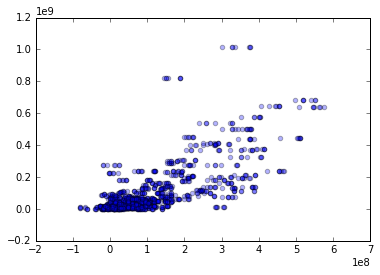

In [788]:
# and lol remember that dictionaries are NOT ordered
for name,model in models.iteritems():
    model.fit(movie_features_train_nodom,movie_target_train)
    print('Model: '+name)
    preds = model.predict(movie_features_test_nodom)
    plt.scatter(preds,movie_target_test, alpha=0.3)
    plt.show
    print('Score: ' + str(model.score(movie_features_test_nodom,movie_target_test)))
    preds = model.predict(movie_features_test_nodom)
#     plt.scatter(preds,movie_target_test, alpha=0.3)
#     plt.show

# want to see the effect of normalizing and different parameters
# np.logspace selects numbers evenly from -4 to -0.1 (on log scale, goes from 10^4 to 10^0.1)

In [810]:
lasso = linear_model.Lasso()

parameters = {'normalize':(True,False),'alpha':np.logspace(-4,-.1,30)}
grid_searcher = grid_search.GridSearchCV(lasso,parameters)
grid_searcher.fit(movie_features_train_nodom,movie_target_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': (True, False), 'alpha': array([  1.00000e-04,   1.36296e-04,   1.85766e-04,   2.53191e-04,
         3.45089e-04,   4.70342e-04,   6.41057e-04,   8.73734e-04,
         1.19086e-03,   1.62310e-03,   2.21222e-03,   3.01516e-03,
         4.10954e-03,   5.60113e-03,   7.63411e-03...    1.68883e-01,   2.30181e-01,   3.13727e-01,   4.27597e-01,
         5.82797e-01,   7.94328e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [811]:
grid_searcher.best_params_

{'alpha': 0.79432823472428149, 'normalize': True}

In [812]:
best_lasso_model = grid_searcher.best_estimator_

In [813]:
best_lasso_model.score(movie_features_test_nodom,movie_target_test)

0.54595811082805001

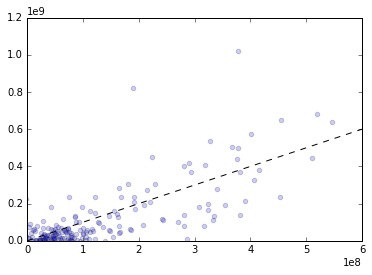

In [819]:
temp = np.linspace(0,700000000,5000)

preds = best_lasso_model.predict(movie_features_test_nodom)
plt.scatter(preds,movie_target_test,alpha=0.2)
plt.xlim(0)
plt.ylim(0)
plt.plot(temp,temp,'k--')

In [782]:
scores = cross_val_score(best_lasso_model, movie_features_train_nodom,movie_target_train,cv=kfold)

In [783]:
print ("scores: ",scores)
print "avg score: ", np.mean(scores)

('scores: ', array([ 0.60134816,  0.5763293 ,  0.2848228 ,  0.64295048,  0.75062312,
        0.65291509,  0.30576805,  0.62850661,  0.54643473,  0.45996296]))
avg score:  0.54496612853


# Doing the actor/director/producer/writer experience thing bumped my scores for lin reg up ~10%

# Gradient Boosting

# Things to ask:
* Gridsearch with gradient boosting?
* Gridsearch with random forests